<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 2  Part 2: Physical Data</u></b></p>

In [7]:
import os
import sys
sys.path.insert(0,r'BaITools')

import numpy as np
from numpy.fft import fft2, fftshift, ifftshift
from time import sleep
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, clear_output
import cv2
plt.rcParams['font.size'] = 16
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [ ]:
from zelux import ZeluxCamera as Camera
print('Camera initialized as c')
c = Camera()
c.open()

c.get_properties()
c.set_exposure(30)
c.get_exposure()
c.set_framerate(2)
c.get_framerate()

Camera initialized as c


TLCameraError: TLCameraSDK is already in use. Please dispose of the current instance before trying to create another

In [5]:
def average_images(num_images):
    image_10bit_stack = []
    for _ in range(num_images):
        image_10bit_stack.append(c.capture().copy())
    image_8bit_stack = [cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U) for img in image_10bit_stack]

    average_image_10bit = np.mean(image_10bit_stack, axis=0)
    average_image_8bit = cv2.normalize(average_image_10bit, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return average_image_8bit, average_image_10bit

def capture_image(save_name="False"):
    image_10bit = c.capture().copy()
    image_8bit = cv2.normalize(image_10bit, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    cv2.imshow('Image', image_8bit)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    if save_name != "False":
        fig, ax = plt.subplots(1, figsize=(12, 5))
        x = ax.imshow(D, cmap='gray')
        fig.colorbar(x, ax=ax)
        ax.set_xlabel('X Axis pixels')
        ax.set_ylabel('Y Axis pixels')
        plt.savefig(save_name)
        plt.clf()
    return image_10bit, image_8bit

def continuous_capture(save_name="saved_image.png"):
    c.set_exposure(30)
    while True:
        cv2.imshow('Camera', cv2.normalize(c.capture().copy(), None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)) #show 8 bit image
        if cv2.waitKey(30) & 0xFF == ord('s'):
            image = c.capture().copy()
            fig, ax = plt.subplots(1, figsize=(12, 5))
            x = ax.imshow(image, cmap='gray')
            fig.colorbar(x, ax=ax)
            ax.set_xlabel('X Axis pixels')
            ax.set_ylabel('Y Axis pixels')
            plt.savefig(save_name)
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()
    return image

def get_magnification():
    image_10bit = continuous_capture()

    %matplotlib widget

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_axes([0.1, 0.3, 0.6, 0.6])

    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("right", size="7%", pad="2%")

    im = ax.imshow(image_10bit, cmap='gray')
    cb = fig.colorbar(im, cax=cax)

    hfig = display(fig, display_id=True)
    plt.show()

def calculate_magnification(x1, y1, x2, y2, grid_size=100e-6, camera_size = 3.45e-6):
    d_squared = (x1-x2)**2 + (y1-y2)**2
    d = np.sqrt(d_squared) #number of pixels between grid_size um

    pixel_size_object = grid_size / d
    print('Pixel size of camera:', camera_size)
    print('Pixel size in object plane:', pixel_size_object)

    magnification = camera_size / pixel_size_object
    print('Magnification:', magnification)

    return magnification, pixel_size_object

def calculate_objectsamplingfrequency(pixel_size_object):
    object_sampling_frequency = 1 / pixel_size_object # in 1 / m
    object_sampling_frequency_mm = object_sampling_frequency / 1000
    print('Object sampling frequency in mm:', object_sampling_frequency_mm)
    return object_sampling_frequency

def show_image_fourier(image_10bit, name=""):
    D_shifted = ifftshift(image_10bit)
    D_fourier = fft2(D_shifted)
    D_fourier_shifted = fftshift(D_fourier)

    D_fourier_magnitude = np.abs(D_fourier_shifted)
    D_fourier_magnitude_log = np.log(D_fourier_magnitude)

    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    #image
    im0 = axes[0].imshow(image_10bit, origin='lower', cmap='gray')
    axes[0].set_title(f"Original Image - {name}")
    axes[0].set_xlabel("Frequency X (1/mm)")
    axes[0].set_ylabel("Frequency Y (1/mm)")
    fig.colorbar(im0, ax=axes[0], label='Magnitude')

    #fourier
    im1 = axes[1].imshow(D_fourier_magnitude_log, origin='lower', cmap='gray')
    axes[1].set_title(f"Fourier Transform Magnitude Log Scale - {name}")
    axes[1].set_xlabel("Frequency X (1/mm)")
    axes[1].set_ylabel("Frequency Y (1/mm)")
    fig.colorbar(im1, ax=axes[1], label='Magnitude (log scale)')

    plt.show()

    return D_fourier_magnitude_log

def zoom_image(image, x1, y1, x2, y2):
    zoomed = image[y1:y2, x1:x2]

    plt.figure(figsize=(7,7))
    plt.imshow(zoomed, cmap='gray')
    plt.title('Zoomed-In Image')
    plt.xlabel('X Pixels')
    plt.ylabel('Y Pixels')
    plt.show()
    plt.savefig('zoomed_image.png')
    return zoomed


#Redo magnification values from last lab

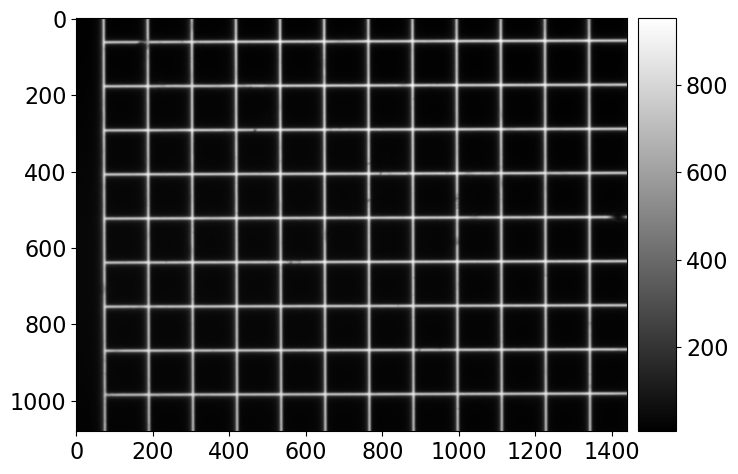

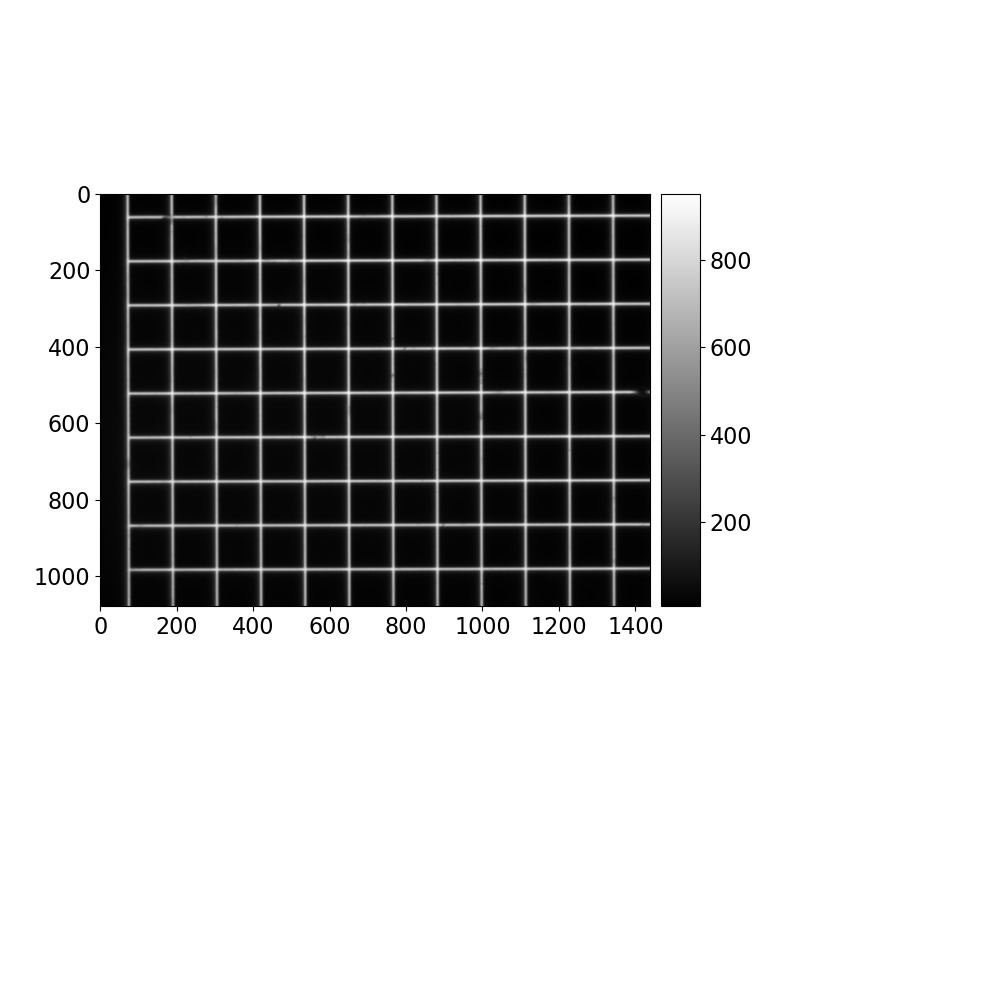

In [ ]:
get_magnification()

In [ ]:
x1 = 185
y1 = 982
x2 = 1341
y2 = 983
M1, _ = calculate_magnification(x1, y1, x2, y2, 1000e-6, 3.45e-6)

Pixel size of camera: 3.45e-06
Pixel size in object plane: 8.650515794487998e-07
Magnification: 3.9882014922142535


Exception ignored in: <function ZeluxCamera.__del__ at 0x0000013B91027B80>
Traceback (most recent call last):
  File "C:\Users\build_an_imager_13\Downloads\BaITools\zelux.py", line 39, in __del__
    self._cam.disarm()
AttributeError: 'ZeluxCamera' object has no attribute '_cam'
Exception ignored in: <function ZeluxCamera.__del__ at 0x0000013B91027B80>
Traceback (most recent call last):
  File "C:\Users\build_an_imager_13\Downloads\BaITools\zelux.py", line 39, in __del__
    self._cam.disarm()
AttributeError: 'ZeluxCamera' object has no attribute '_cam'


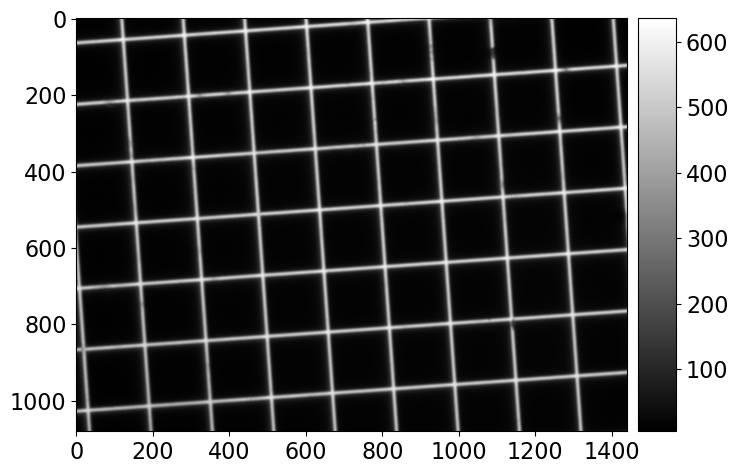

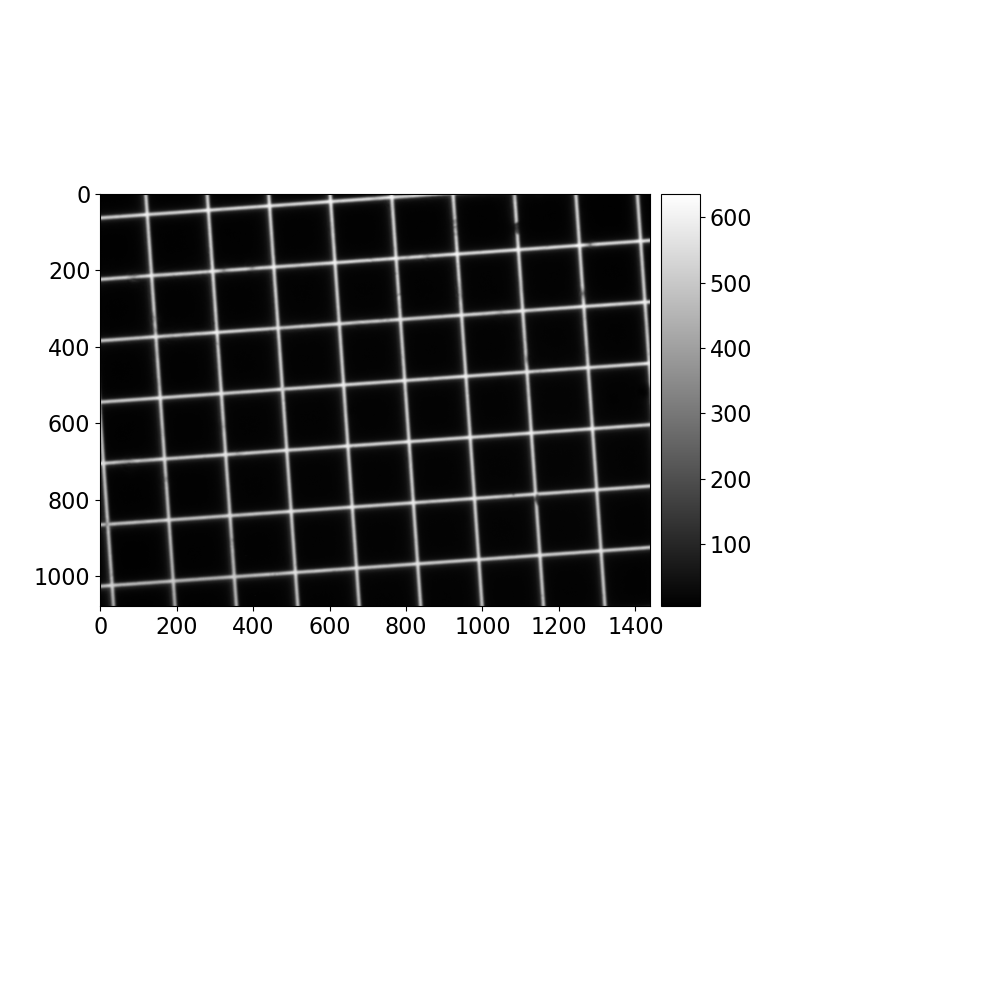

In [ ]:
get_magnification()

In [ ]:
x1 = 18
y1 = 862
x2 = 1299
y2 = 768
M2, _ = calculate_magnification(x1, y1, x2, y2, 800e-6, 3.45e-6)


Pixel size of camera: 3.45e-06
Pixel size in object plane: 6.228374704490988e-07
Magnification: 5.539165775482916


In [ ]:
z = 0.0508 #meters
M1 = 3.9882014922142535
M2 = 5.539165775482916

f = z / (M2 - M1)
print(f)

#calculate z for 2.4x magnification
M3 = 2.4
z = f * (M3 - M2)
print(z)


0.03275381680159573
-0.10281966072000663


z = -0.10281966072000663 from M2, thus we need to remove 4 inches off the camera to get the desired 2.4x magnification

<div class="alert alert-block alert-warning">
<b>Looking at Fourier Transforms of Real Imaging Data:</b> <font color='black'>  

We have setup the microscrope according to your design from Lab 1. Place your resolution target on the stage. For these microscope experiments, use the “no filter” setting on the wheel. We will be concentrating on the star pattern target, though you will need to use the grid targets to measure pixel size and sampling frequency.
</font>
</div>

<img src="Lab2\StarSector.png" style="width:700px">

# Fourier transform of real data

<div class="alert alert-block alert-success">
<font color='black'> 1. Measure the Magnification of the system. What is the maginification and the object plane sampling frequency (samples/mm)?  </font><br/>
</div>

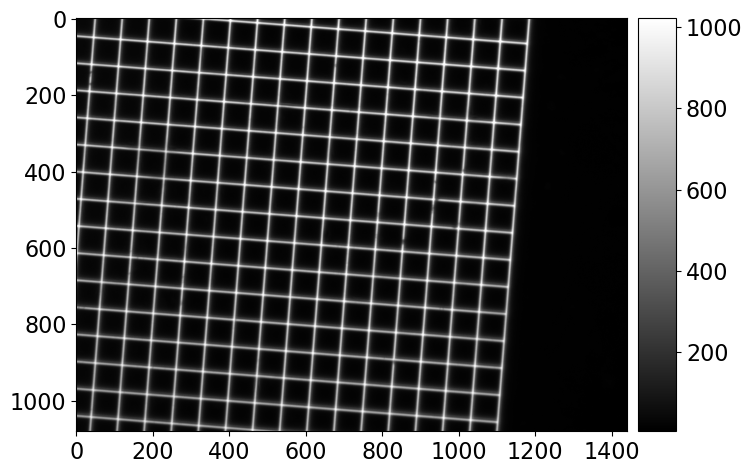

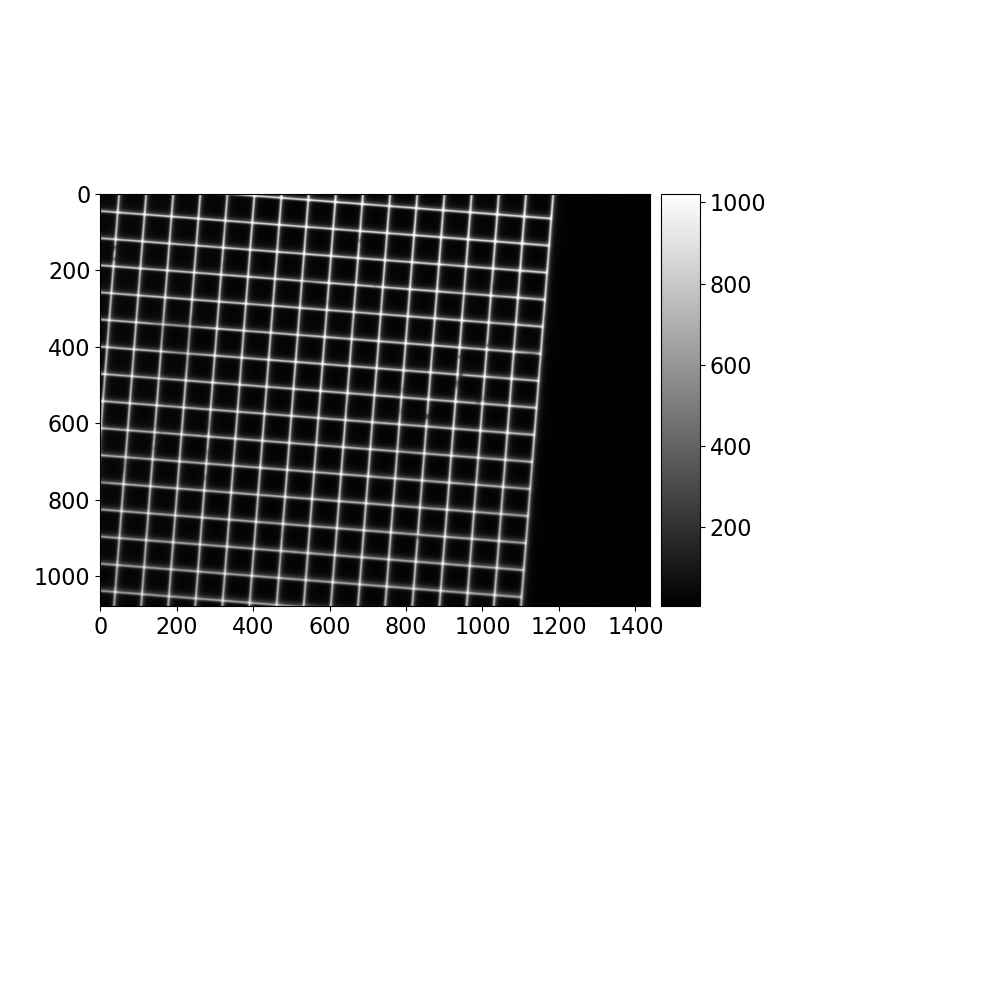

In [ ]:
get_magnification()

In [ ]:
x1 = 49
y1 = 899
x2 = 755
y2 = 958
calculate_magnification(x1, y1, x2, y2, 1000e-6, 3.45e-6)

Pixel size of camera: 3.45e-06
Pixel size in object plane: 1.4115102857670958e-06
Magnification: 2.4441904779497032


(2.4441904779497032, 1.4115102857670958e-06)

In [2]:
pixel_size_object = 1.4115102857670958e-06
magnification = 2.4441904779497032

object_sampling_frequency = 1 / pixel_size_object # in 1 / m
object_sampling_frequency_mm = object_sampling_frequency / 1000
print('Object sampling frequency in samples/mm:', object_sampling_frequency_mm)

Object sampling frequency in samples/mm: 708.4610081013632


<div class="alert alert-block alert-success">

<font color='black'> 2. Show an image and a <u>properly labeled</u> Fourier transform images side-by-side (e.g. using `plt.subplots(ncols=2)`, see Lab 0). <br/> Please display the base-10 logarithm of the magnitude of the Fourier transform.
</font>
</div>

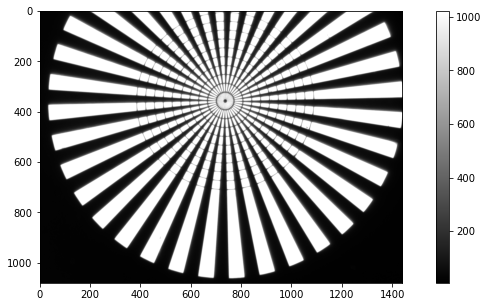

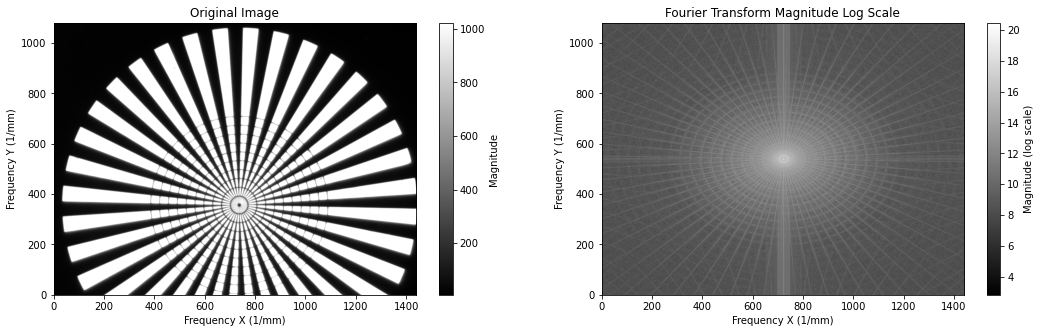

array([[7.12367279, 7.92308446, 7.72605885, ..., 7.02481205, 7.72605885,
        7.92308446],
       [8.40843456, 8.93329352, 8.4375656 , ..., 8.04126797, 7.37704113,
        8.22703582],
       [7.91240345, 8.55466911, 8.76882451, ..., 9.15239652, 7.59593637,
        7.86829576],
       ...,
       [7.46688953, 8.82445654, 8.98312353, ..., 7.67761405, 8.34289655,
        7.55034949],
       [7.91240345, 7.86829576, 7.59593637, ..., 7.57707667, 8.76882451,
        8.55466911],
       [8.40843456, 8.22703582, 7.37704113, ..., 8.00557803, 8.4375656 ,
        8.93329352]])

In [ ]:
image_10bit = continuous_capture()
show_image_fourier(image_10bit)

<div class="alert alert-block alert-success">
<font color='black'> 3. Center your image on the star pattern (green cycle shown above) and show your image and Fourier transform pair. <br/> Place your image so that only the star pattern is in the field of view (no other targets, no text “STAR SECTOR 10D” visible) and try to get the best possible focus. Get a good exposure with wide-open aperture.
</font>
    
<font color='black'> Show the two images below and describe general features:
</font>
</div>

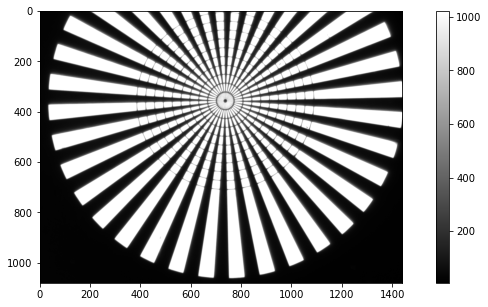

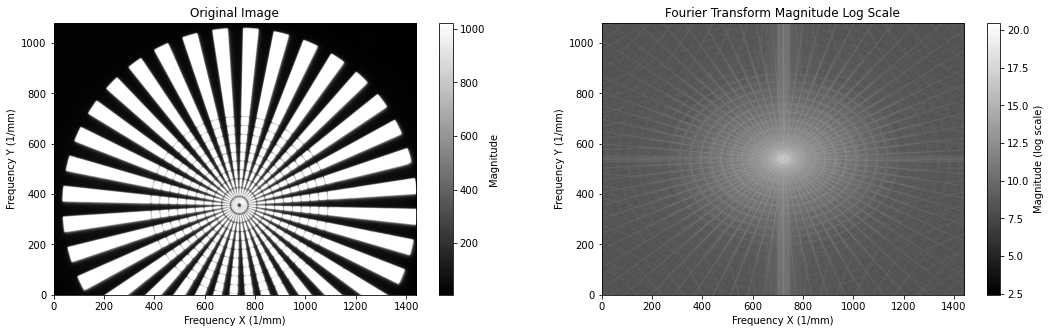

array([[8.12563099, 6.81437663, 8.40472052, ..., 8.18752471, 8.40472052,
        6.81437663],
       [8.85610661, 8.38032638, 8.39771243, ..., 9.12876552, 7.47060968,
        8.04833317],
       [8.58008063, 8.35506776, 7.91154606, ..., 9.15230036, 8.73149292,
        7.67990658],
       ...,
       [8.28727906, 8.91792428, 8.67125534, ..., 9.16168933, 9.0712108 ,
        5.88752789],
       [8.58008063, 7.67990658, 8.73149292, ..., 8.48171624, 7.91154606,
        8.35506776],
       [8.85610661, 8.04833317, 7.47060968, ..., 7.3305568 , 8.39771243,
        8.38032638]])

In [ ]:
c.get_exposure()
image_10bit = continuous_capture()
show_image_fourier(image_10bit)

The star pattern is centered and in good focus with the wide-open aperture. The lines are sharp and clear all the way to the middle. In the Fourier transform, you can see strong circular rings, which means a lot of spatial frequency detail is being captured. Everything looks symmetric, so the setup seems well-aligned and properly exposed.

# Effect of Defocus

<div class="alert alert-block alert-success">
    
<font color='black'> 4. Intentionally defocus your image. Capture another image-Fourier transform pair. <br/>
Show below and describe what you see (in particular, the changes from the focused image pair).
</font>

</div>

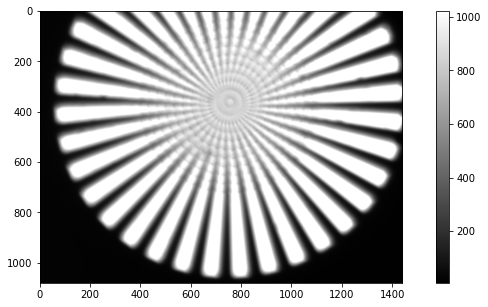

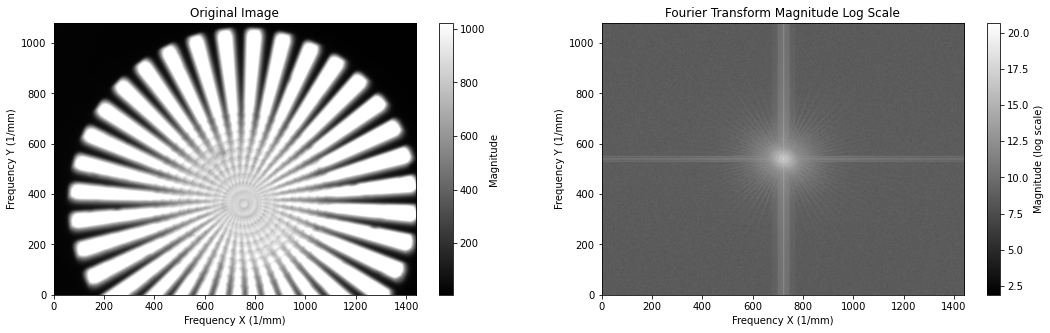

array([[9.10708874, 9.47655056, 8.73884381, ..., 8.72057242, 8.73884381,
        9.47655056],
       [8.12944459, 8.6205226 , 8.44938137, ..., 6.84847319, 8.46530447,
        9.12765092],
       [8.7630547 , 8.82905814, 9.07262948, ..., 7.27066342, 8.62351214,
        9.11029953],
       ...,
       [9.13091299, 7.72003096, 7.83174807, ..., 9.07452439, 8.41082926,
        9.0222725 ],
       [8.7630547 , 9.11029953, 8.62351214, ..., 8.85522283, 9.07262948,
        8.82905814],
       [8.12944459, 9.12765092, 8.46530447, ..., 8.79984408, 8.44938137,
        8.6205226 ]])

In [ ]:
image_10bit = continuous_capture()

show_image_fourier(image_10bit)

After defocusing the image, the star pattern looks more blurry, especially near the center where the fine lines are harder to see. In the Fourier transform, the high-frequency rings are much weaker or missing compared to the focused image. This shows that the system isn't capturing as much detail when it's out of focus, and a lot of the fine structure is lost.

<div class="alert alert-block alert-success">
    
<font color='black'> 5. <u> <i> Without changing focus (e.g. in the same defocused state) </u> </i>, shift your slide to the line pair targets and obtain an image (Fourier transform not required). <br/> Show a full-field and zoomed image of the finest line pairs that are still visible (e.g., not blurry).<br/><br/></font>
    
<font color='black'> What is the number of line-pairs/mm for this limiting visibility?   _________________
<br/>(The following table will help you find the lp/mm for each target.)</font>

</div>

<img src="Lab2\LinePairTable.png" style="width:600px">
Values are in lp/mm.

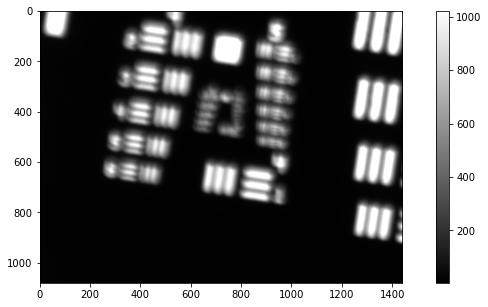

In [ ]:
image_10bit = continuous_capture()

Image shape: (360, 864, 3)


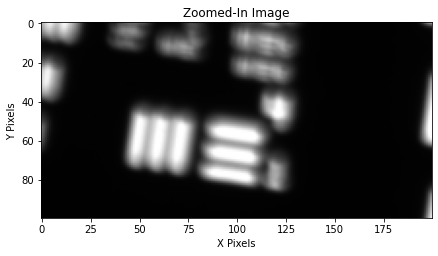

<Figure size 432x288 with 0 Axes>

In [ ]:
image_10bit = cv2.imread('q5_linepairs.png')
print(f"Image shape: {image_10bit.shape}")
x1, y1, x2, y2 = 400, 150, 600, 250
zoomed_image = zoom_image(image_10bit, x1, y1, x2, y2)

group 4 element 1 -> 16 lp/mm

<div class="alert alert-block alert-success">
    
<font color='black'> 6. Describe how the maximum visibility of line pairs compare with what you see in the Fourier transform of the defocused star pattern? <br/> (Hint: Consider the maximum frequency seen in the Fourier image.)  <br/>
</font>

</div>

The maximum visibility of the line pairs seems to match up with the highest spatial frequency we can see in the Fourier transform of the defocused star pattern. In the lab, when we looked at the Fourier image, the brighter rings or patterns faded out after a certain point, which shows the limit of what frequencies (or details) the system could capture when it was out of focus.

Since visibility drops off for finer line pairs in the star image, it makes sense because those details correspond to higher frequencies and those are the ones that disappear in the Fourier transform when the image is blurry. So basically, the more out of focus the image is, the lower the maximum frequency we can detect, and that matches the point where the line pairs start to blend together and lose contrast.

<div class="alert alert-block alert-success">
    
<font color='black'> 7. Refocus your microscope and repeat the line pair test, showing maximum visibility (full-field and zoom), and describing the relationship between the star pattern Fourier image and maximum line pair visibility.  <br/>
</font>

</div>

After refocusing the microscope and repeating the line pair test, the line pairs were much sharper and clearer compared to the defocused version. In the full-field image, the entire pattern looked more crisp, and when zooming in, even the finest line pairs were much more visible and well-defined.

Looking at the Fourier transform of the refocused star pattern, there were noticeably more high-frequency components present. The bright rings in the Fourier image extended farther out, which means the system was capturing higher spatial frequencies. This directly relates to better visibility of finer line pairs in the original image — the more high-frequency detail we can see in the Fourier domain, the more line pairs we can resolve in the spatial domain.

So, the main relationship is: better focus gives us a broader range of frequencies in the Fourier transform, which leads to maximum visibility of the finest line pairs in the star pattern.



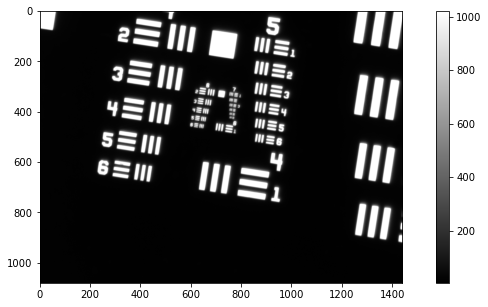

In [ ]:
image_10bit = continuous_capture()

Image shape: (360, 864, 3)


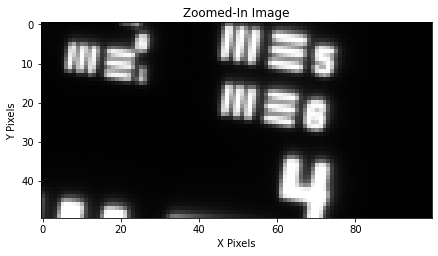

<Figure size 432x288 with 0 Axes>

In [ ]:
image_10bit = cv2.imread('q7_linepairs.png')
print(f"Image shape: {image_10bit.shape}")
x1, y1, x2, y2 = 450, 150, 550, 200
zoomed_image = zoom_image(image_10bit, x1, y1, x2, y2)

group 5 element 6 -> 57 lp/mm

# Effect of Aperture

<div class="alert alert-block alert-success">
    
<font color='black'> 8. Return to the star pattern target at best focus. Compare image-Fourier pairs for three aperture settings – as shown in the picture below. <br/> Show those pairs and describe what you see. <br/>
Recall that the range limit of the aperture motor is different on every system. Experiment with your system to find out where the limits are. <br/>
</font>

</div>

<img src="Lab2\aperture.png" style="width:900px">
Example aperture position: wide open (100% open), medium aperture (60% open), small aperture (30% open)

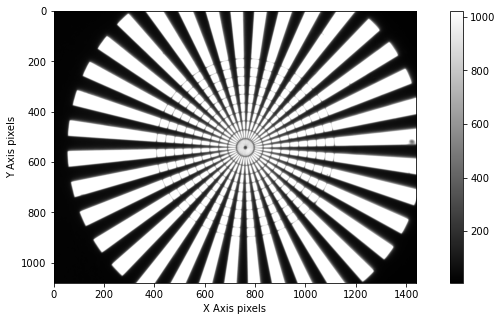

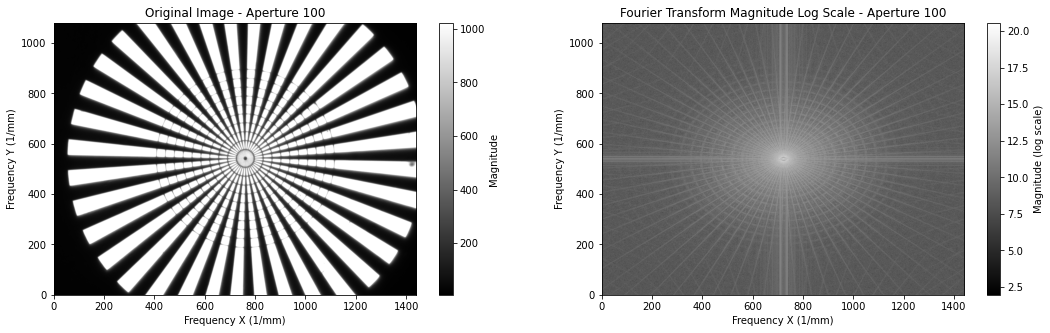

array([[6.58063914, 8.39211926, 9.295761  , ..., 8.73471804, 9.295761  ,
        8.39211926],
       [8.82411819, 9.20075248, 8.26732369, ..., 6.95659462, 7.88134211,
        7.29197139],
       [7.67467065, 8.95821683, 9.13309849, ..., 7.67522119, 7.87377805,
        8.88049186],
       ...,
       [7.72145694, 8.27016869, 8.54738328, ..., 6.62659385, 8.00729723,
        7.75685009],
       [7.67467065, 8.88049186, 7.87377805, ..., 7.87095954, 9.13309849,
        8.95821683],
       [8.82411819, 7.29197139, 7.88134211, ..., 8.87637198, 8.26732369,
        9.20075248]])

In [ ]:
image_10bit = continuous_capture('aperture100.png')
show_image_fourier(image_10bit, 'Aperture 100')

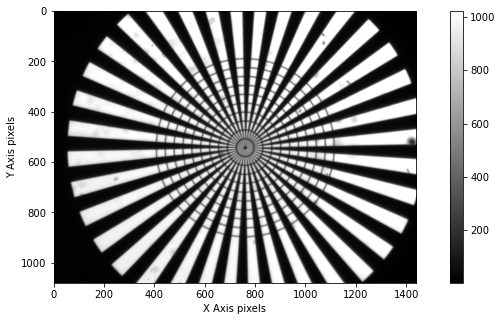

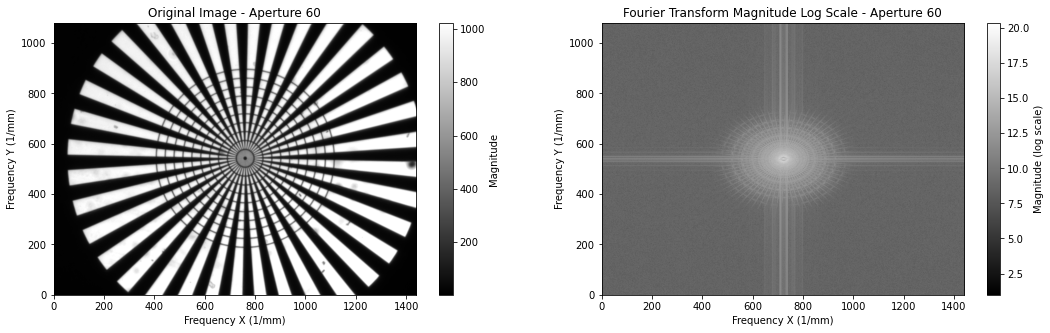

array([[9.09504175, 8.61793353, 8.42807367, ..., 8.30760378, 8.42807367,
        8.61793353],
       [8.3487514 , 9.15360119, 9.14393519, ..., 8.53519707, 8.55424926,
        8.90370809],
       [8.22835109, 7.49204349, 8.83578457, ..., 7.55762413, 8.78595576,
        7.98769775],
       ...,
       [6.99150586, 8.3764047 , 8.94159981, ..., 9.18288631, 8.92820168,
        8.36024361],
       [8.22835109, 7.98769775, 8.78595576, ..., 7.8986333 , 8.83578457,
        7.49204349],
       [8.3487514 , 8.90370809, 8.55424926, ..., 7.07218641, 9.14393519,
        9.15360119]])

In [ ]:
image_10bit = continuous_capture('aperture60.png')
show_image_fourier(image_10bit, 'Aperture 60')

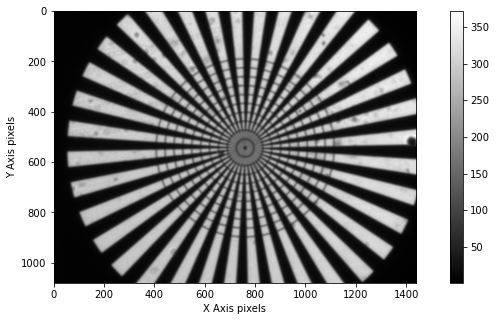

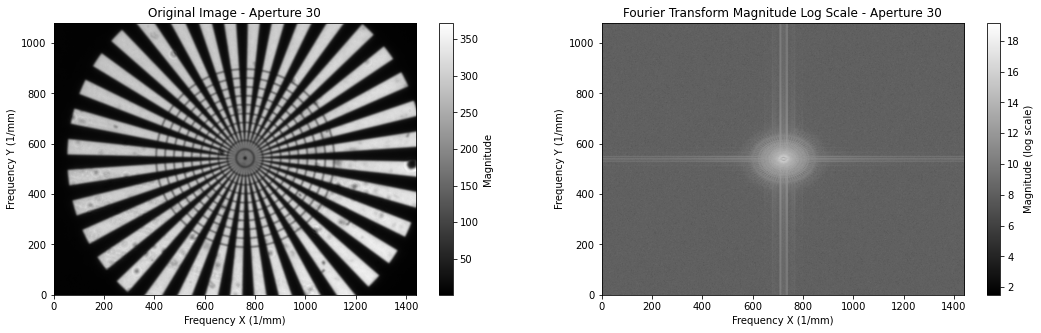

array([[8.76966251, 8.53640493, 8.6887931 , ..., 7.82161561, 8.6887931 ,
        8.53640493],
       [7.67611961, 8.4251154 , 8.62736585, ..., 7.7319946 , 8.29205446,
        8.59931073],
       [8.64787681, 6.93896782, 8.83417169, ..., 8.35005387, 8.22967362,
        8.53157866],
       ...,
       [8.6690668 , 7.73320423, 8.3346937 , ..., 8.02890419, 8.08817306,
        8.77278436],
       [8.64787681, 8.53157866, 8.22967362, ..., 8.66193014, 8.83417169,
        6.93896782],
       [7.67611961, 8.59931073, 8.29205446, ..., 7.12249822, 8.62736585,
        8.4251154 ]])

In [ ]:
image_10bit = continuous_capture('aperture30.png')
show_image_fourier(image_10bit, 'Aperture 30')

We tested the star pattern at best focus using the three different aperture settings.

Aperture 100: This setting gave us the sharpest image and the most detailed Fourier transform. The original image showed clear visibility of fine line pairs, especially near the center of the star. In the Fourier domain, we saw a wide spread of frequency components extending far from the center, which means the system was capturing a high range of spatial frequencies. This shows great resolution.

Aperture 60: The image was still fairly detailed, but slightly less sharp than aperture 100. In the Fourier image, the frequency spread was noticeably smaller. While mid-frequency details were still present, the higher frequencies started to drop off. This showed a bit of a trade-off with less light, but a slight loss in resolution.

Aperture 30: At this setting, the image was dim and some of the finer line pairs were harder to distinguish. The Fourier transform had a tight, compact frequency spread with very few high-frequency components visible. This means the resolution was clearly reduced, likely due to diffraction limiting the system when the aperture was too small.

Overall, we observed that a larger aperture (100) allows more spatial frequencies to pass through, giving better resolution and visibility of fine details. As we reduced the aperture (60 and 30), the resolution dropped and the Fourier transforms confirmed this by showing less frequency content. So, the aperture setting has a direct impact on how much detail we can resolve in both the image and the Fourier domain.

<div class="alert alert-block alert-warning">
<b>Set up a Low Magnification Imaging System:</b> <font color='black'>

Let’s consider a very low magnification imaging system. Using only the 1” and ½” optical tubes construct the system shown below. The 1” tube is connected to the lens and the ½” tube is connected to the camera. For all experiments below use Filter 1. Note that to obtain a good exposure level, you will probably need to maximize the brightness of the LED illuminator.
</font>
</div>

<img src="Lab2\ConcentricCircle.png" style="width:900px">


# Low magnification system

<div class="alert alert-block alert-success">
<font color='black'> 9. Measure the Magnification of the system. What is the maginification and the object plane sampling frequency (samples/mm)?  </font><br/>
</font>
</div>

100% aperture

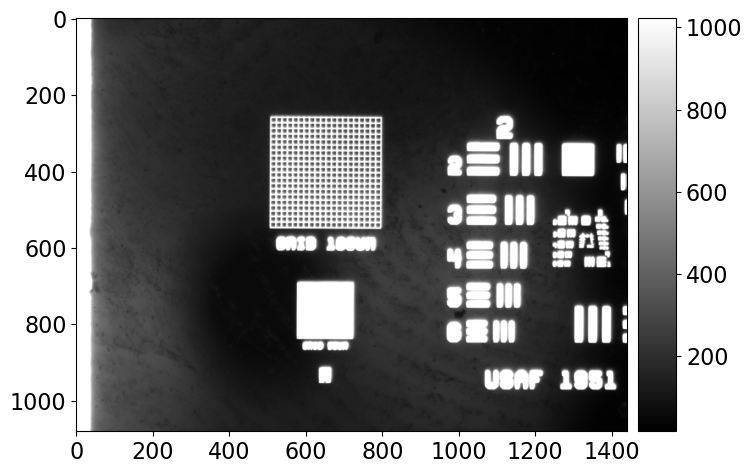

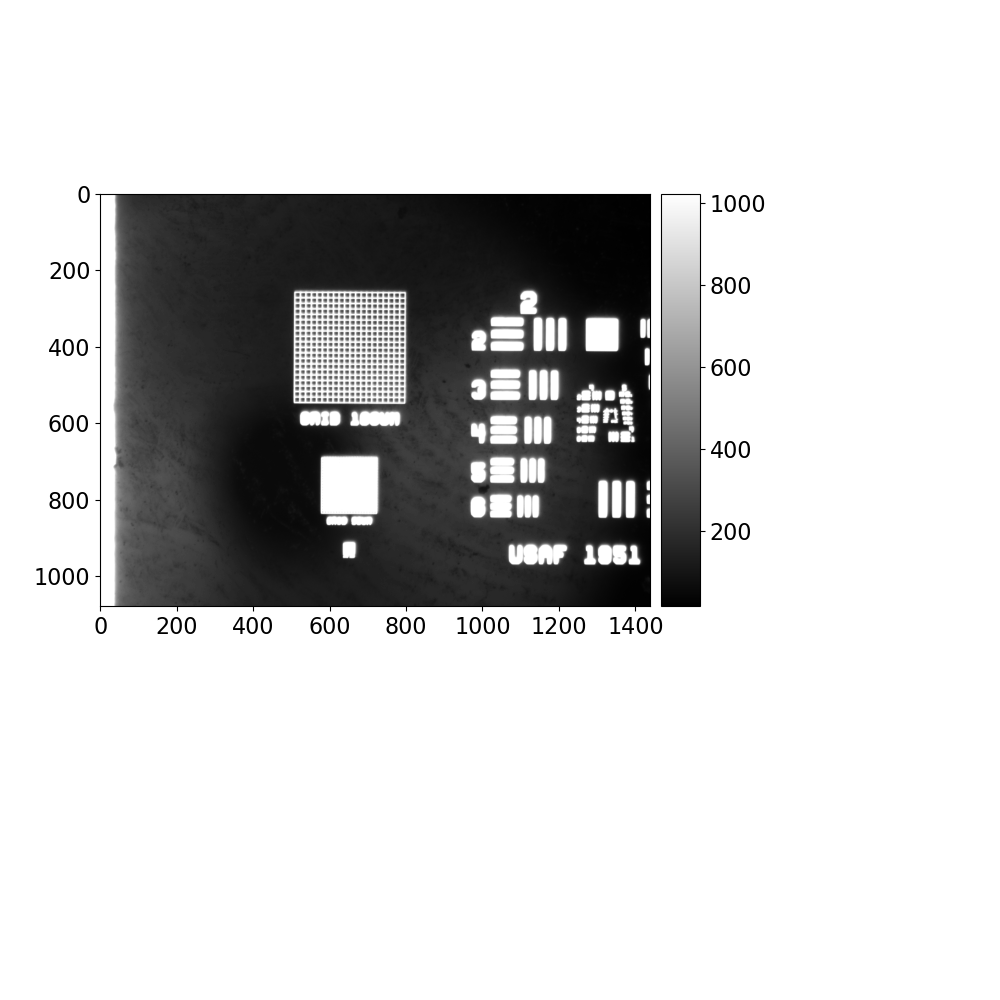

In [ ]:
get_magnification()

In [ ]:
%matplotlib inline
x1 = 510
y1 = 252
x2 = 803
y2 = 252
magnification, pixel_size_object = calculate_magnification(x1, y1, x2, y2, 2000e-6, 3.45e-6)
object_sampling_frequency = calculate_objectsamplingfrequency(pixel_size_object)

Pixel size of camera: 3.45e-06
Pixel size in object plane: 6.825938566552901e-06
Magnification: 0.505425
Object sampling frequency in mm: 146.5


<div class="alert alert-block alert-success">
<font color='black'> 10. Repeat the following data collection for three aperture settings.
</font>
</div>

80 aperture

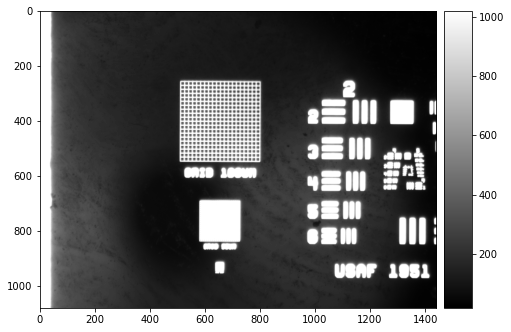

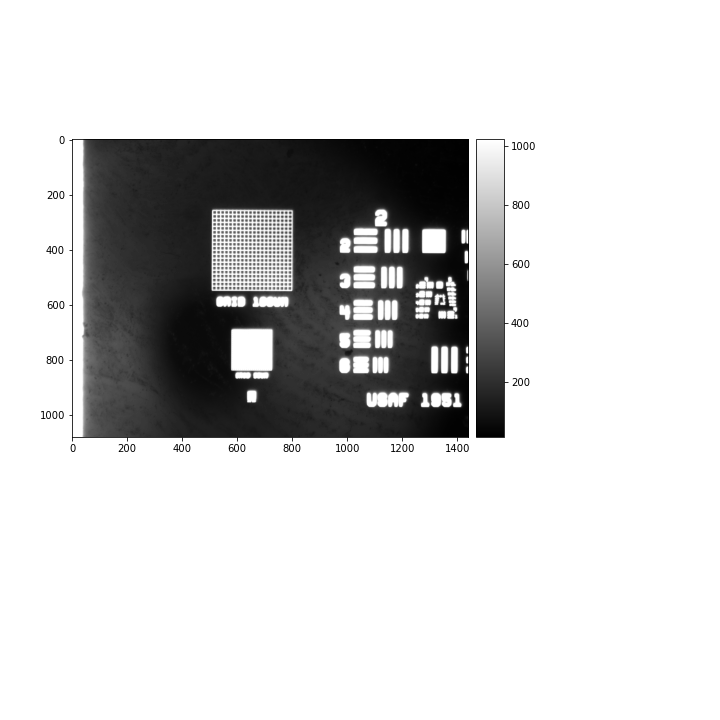

In [ ]:
get_magnification()

In [ ]:
%matplotlib inline
x1 = 504
y1 = 258
x2 = 795
y2 = 250
magnification, pixel_size_object = calculate_magnification(x1, y1, x2, y2, 2000e-6, 3.45e-6)
object_sampling_frequency = calculate_objectsamplingfrequency(pixel_size_object)

Pixel size of camera: 3.45e-06
Pixel size in object plane: 6.870256531151019e-06
Magnification: 0.502164654894189
Object sampling frequency in mm: 145.55497243309827


60 aperture

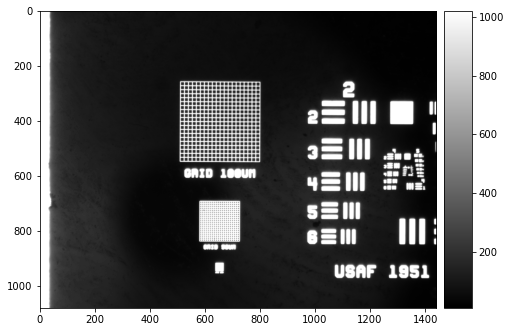

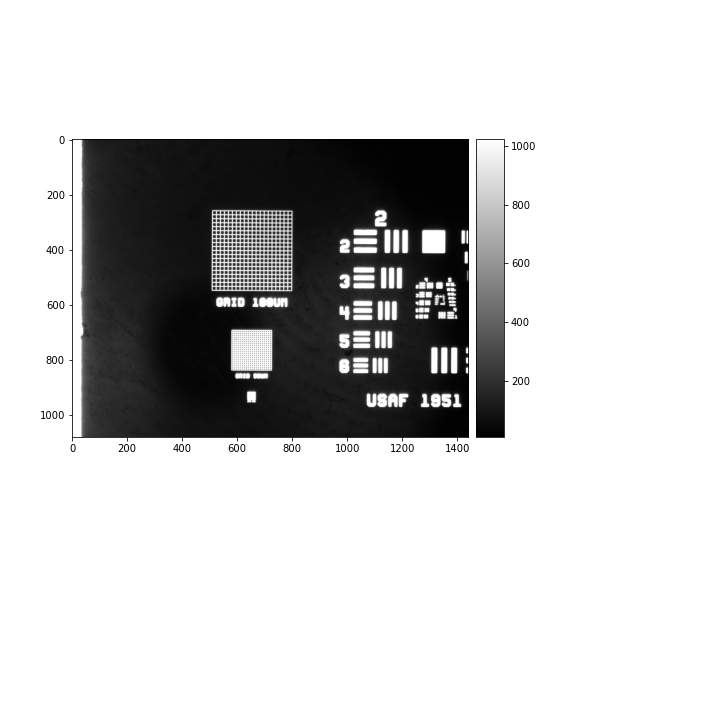

In [ ]:
get_magnification()

In [ ]:
%matplotlib inline
x1 = 504
y1 = 254
x2 = 799
y2 = 254
magnification, pixel_size_object = calculate_magnification(x1, y1, x2, y2, 2000e-6, 3.45e-6)
object_sampling_frequency = calculate_objectsamplingfrequency(pixel_size_object)

Pixel size of camera: 3.45e-06
Pixel size in object plane: 6.779661016949153e-06
Magnification: 0.508875
Object sampling frequency in mm: 147.5


30 aperture

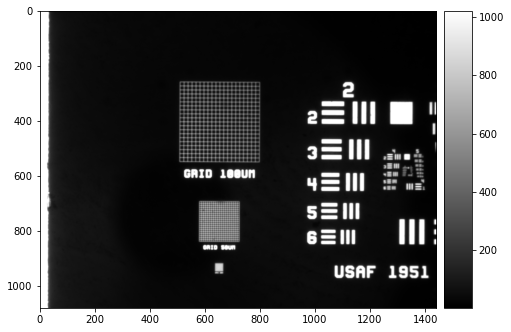

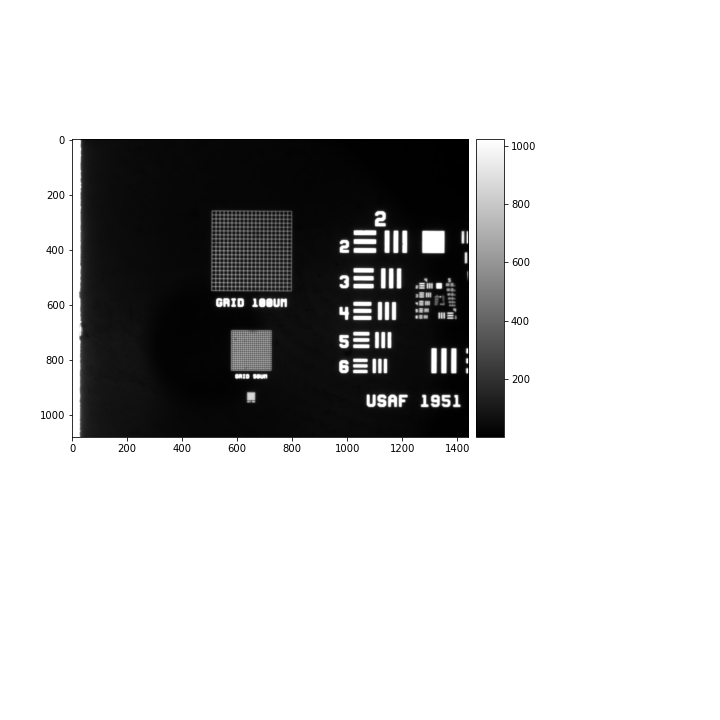

In [ ]:
get_magnification()

In [ ]:
%matplotlib inline
x1 = 508
y1 = 247
x2 = 799
y2 = 258
magnification, pixel_size_object = calculate_magnification(x1, y1, x2, y2, 2000e-6, 3.45e-6)
object_sampling_frequency = calculate_objectsamplingfrequency(pixel_size_object)

Pixel size of camera: 3.45e-06
Pixel size in object plane: 6.8679472079684904e-06
Magnification: 0.5023335059997491
Object sampling frequency in mm: 145.60391478253598


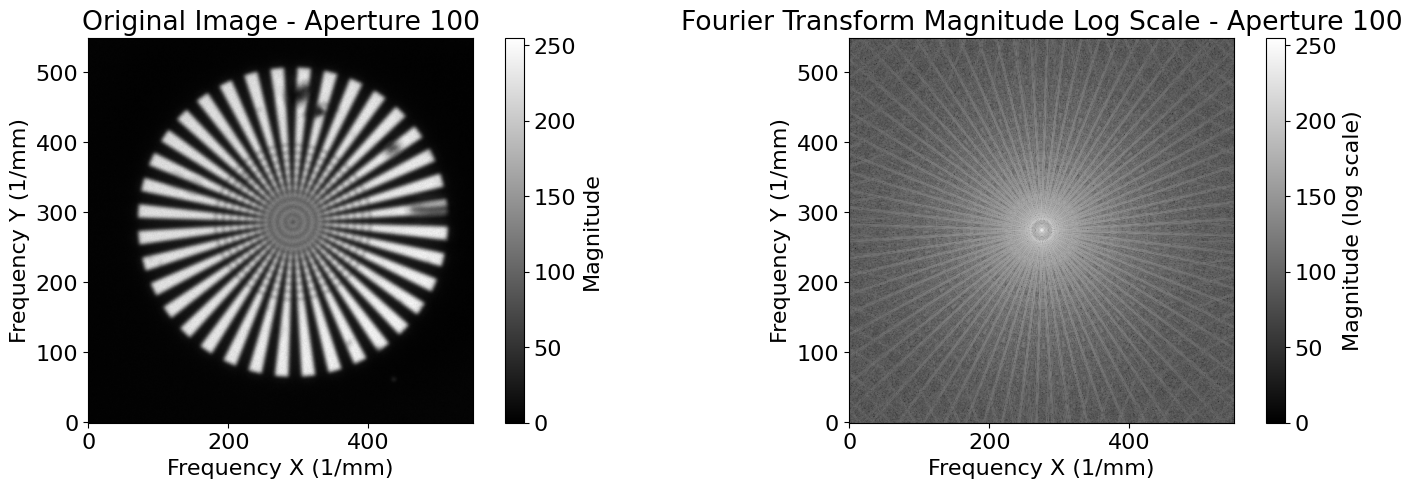

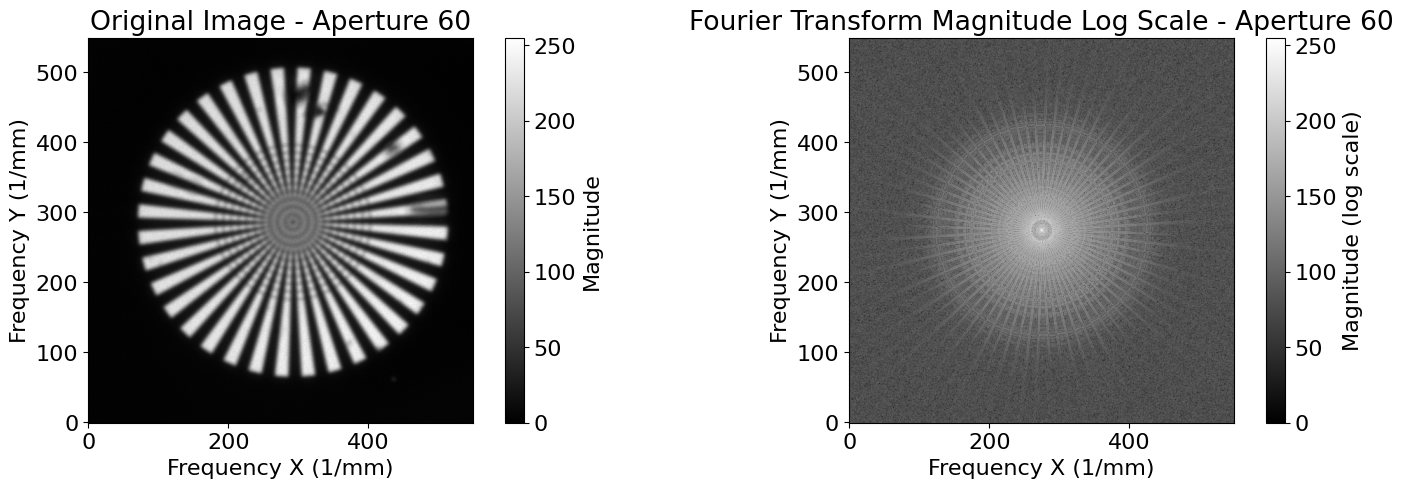

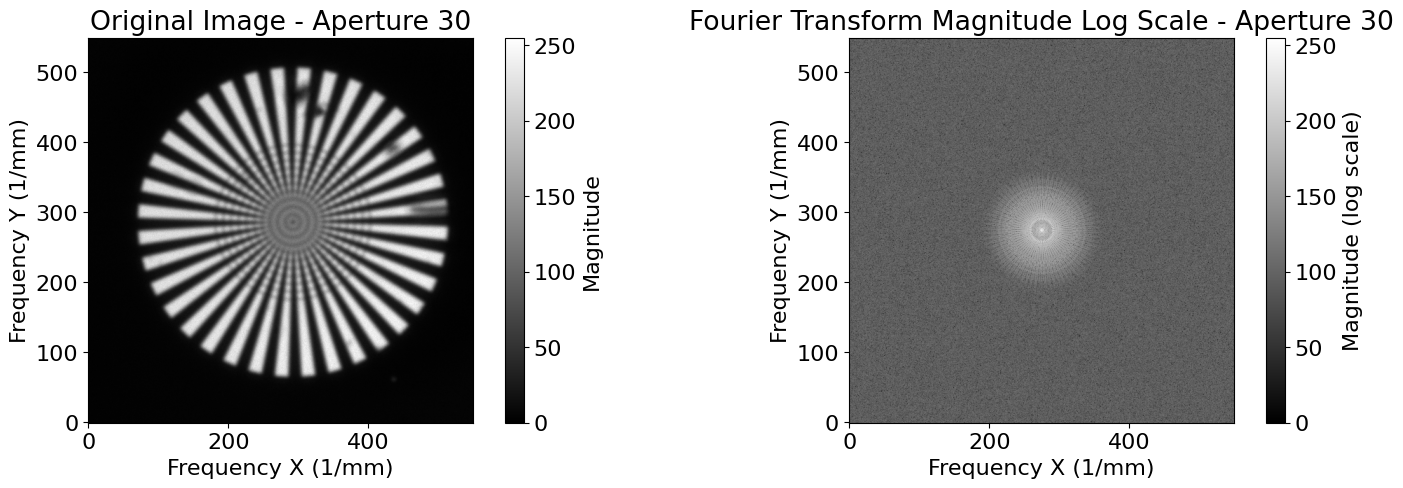

In [17]:
import cv2
aperture_100 = cv2.imread('./Lab2_IMAGES/lowmag_aperture100_star.png')
aperture_60 = cv2.imread('./Lab2_IMAGES/lowmag_aperture60_star.png')
aperture_30 = cv2.imread('./Lab2_IMAGES/lowmag_aperture30_star.png')
fft_aperture100 = cv2.imread('./Lab2_IMAGES/lowmag_fft_aperture100.png')
fft_aperture60 = cv2.imread('./Lab2_IMAGES/lowmag_fft_aperture60.png')
fft_aperture30 = cv2.imread('./Lab2_IMAGES/lowmag_fft_aperture30.png')

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
im0 = axes[0].imshow(aperture_100, origin='lower', cmap='gray')
axes[0].set_title(f"Original Image - Aperture 100")
axes[0].set_xlabel("Frequency X (1/mm)")
axes[0].set_ylabel("Frequency Y (1/mm)")
fig.colorbar(im0, ax=axes[0], label='Magnitude')
im1 = axes[1].imshow(fft_aperture100, origin='lower', cmap='gray')
axes[1].set_title(f"Fourier Transform Magnitude Log Scale - Aperture 100")
axes[1].set_xlabel("Frequency X (1/mm)")
axes[1].set_ylabel("Frequency Y (1/mm)")
fig.colorbar(im1, ax=axes[1], label='Magnitude (log scale)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
im0 = axes[0].imshow(aperture_60, origin='lower', cmap='gray')
axes[0].set_title(f"Original Image - Aperture 60")
axes[0].set_xlabel("Frequency X (1/mm)")
axes[0].set_ylabel("Frequency Y (1/mm)")
fig.colorbar(im0, ax=axes[0], label='Magnitude')
im1 = axes[1].imshow(fft_aperture60, origin='lower', cmap='gray')
axes[1].set_title(f"Fourier Transform Magnitude Log Scale - Aperture 60")
axes[1].set_xlabel("Frequency X (1/mm)")
axes[1].set_ylabel("Frequency Y (1/mm)")
fig.colorbar(im1, ax=axes[1], label='Magnitude (log scale)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
im0 = axes[0].imshow(aperture_30, origin='lower', cmap='gray')
axes[0].set_title(f"Original Image - Aperture 30")
axes[0].set_xlabel("Frequency X (1/mm)")
axes[0].set_ylabel("Frequency Y (1/mm)")
fig.colorbar(im0, ax=axes[0], label='Magnitude')
im1 = axes[1].imshow(fft_aperture30, origin='lower', cmap='gray')
axes[1].set_title(f"Fourier Transform Magnitude Log Scale - Aperture 30")
axes[1].set_xlabel("Frequency X (1/mm)")
axes[1].set_ylabel("Frequency Y (1/mm)")
fig.colorbar(im1, ax=axes[1], label='Magnitude (log scale)')
plt.show()




# Code was ran, but images were deleted due to kernal restarting. Saved pngs of the files were uploaded as seen above

# show_image_fourier(aperture_100, 'Aperture 100')
# show_image_fourier(aperture_60, 'Aperture 60')
# show_image_fourier(aperture_30, 'Aperture 30')

<div class="alert alert-block alert-success">
    
<font color='black'> 11. Using the resolution target focus on the concentric ring. Obtain a zoomed image of the concentric rings only (no text below) and show both image-domain and frequency-domain images with proper axis labels <i> for each of the three aperture settings: </i> <br/>
</font>

</div>

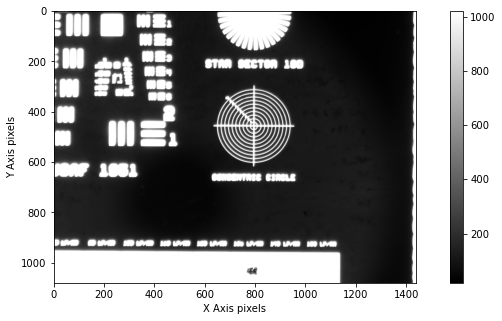

In [ ]:
image_10bit = continuous_capture('concentric_aperture100')

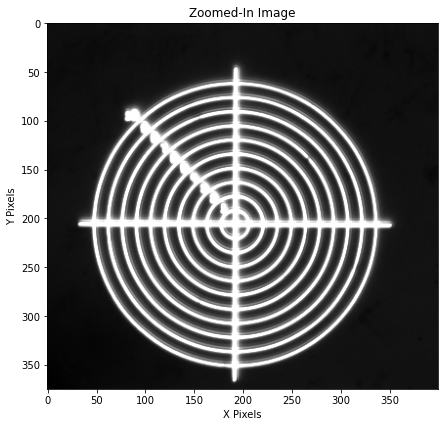

<Figure size 432x288 with 0 Axes>

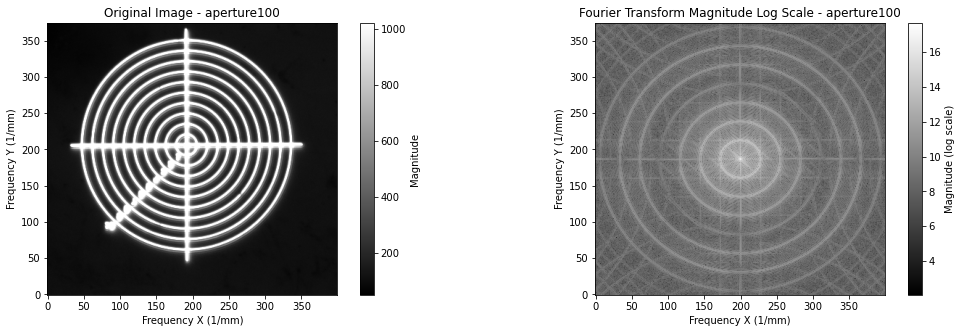

array([[8.28078953, 8.14704444, 8.64747011, ..., 8.4672261 , 8.14114057,
        7.53732809],
       [8.2509352 , 8.30667031, 7.98604684, ..., 8.64065947, 6.99031131,
        7.64864233],
       [7.27559318, 7.95699612, 8.83077483, ..., 8.71793472, 8.35069359,
        8.26866553],
       ...,
       [7.27559318, 8.26866553, 8.35069359, ..., 8.66914083, 8.83077483,
        7.95699612],
       [8.2509352 , 7.64864233, 6.99031131, ..., 8.0083696 , 7.98604684,
        8.30667031],
       [8.28078953, 7.53732809, 8.14114057, ..., 8.41989223, 8.64747011,
        8.14704444]])

In [ ]:
x1, y1, x2, y2 = 600, 250, 1000, 625
zoomed_image = zoom_image(image_10bit, x1, y1, x2, y2)
show_image_fourier(zoomed_image, "aperture100")

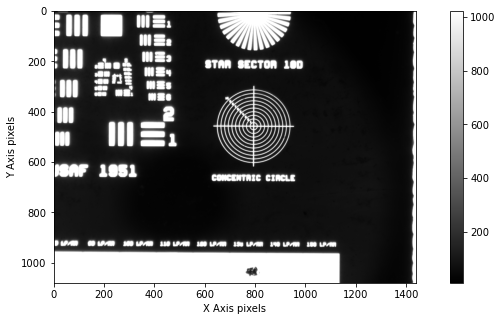

In [ ]:
image_10bit = continuous_capture('concentric_aperture60')

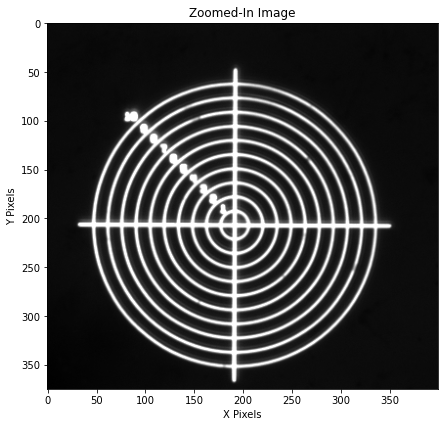

<Figure size 432x288 with 0 Axes>

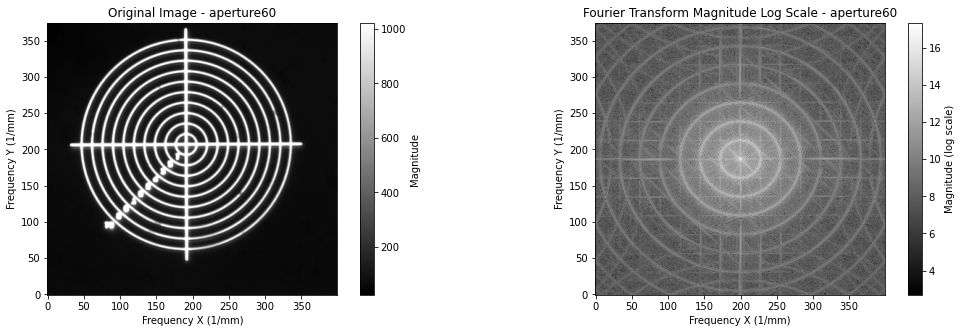

array([[6.31865194, 8.33014358, 6.8519103 , ..., 7.96905065, 6.87163316,
        8.28462563],
       [7.56841777, 7.70170554, 7.5076347 , ..., 7.31469395, 7.61949118,
        7.46646811],
       [6.76168927, 8.45361677, 7.45604317, ..., 6.36842377, 7.72820105,
        8.25486799],
       ...,
       [6.76168927, 8.25486799, 7.72820105, ..., 7.19662152, 7.45604317,
        8.45361677],
       [7.56841777, 7.46646811, 7.61949118, ..., 7.78449044, 7.5076347 ,
        7.70170554],
       [6.31865194, 8.28462563, 6.87163316, ..., 6.71654553, 6.8519103 ,
        8.33014358]])

In [ ]:
x1, y1, x2, y2 = 600, 250, 1000, 625
zoomed_image = zoom_image(image_10bit, x1, y1, x2, y2)
show_image_fourier(zoomed_image, "aperture60")

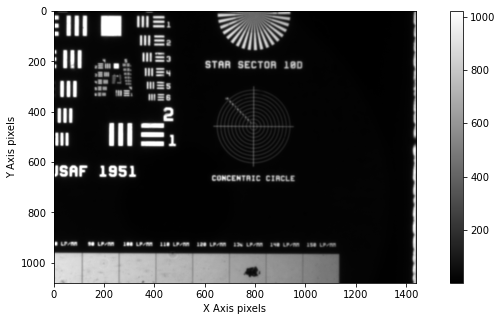

In [ ]:
image_10bit = continuous_capture('concentric_aperture30')

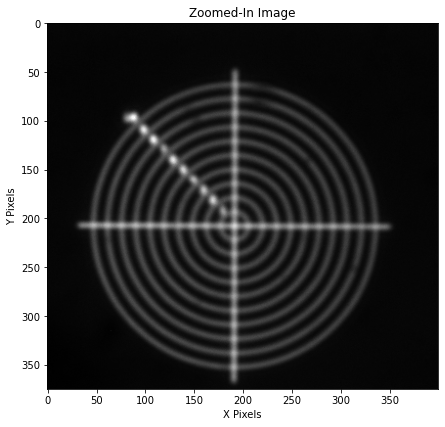

<Figure size 432x288 with 0 Axes>

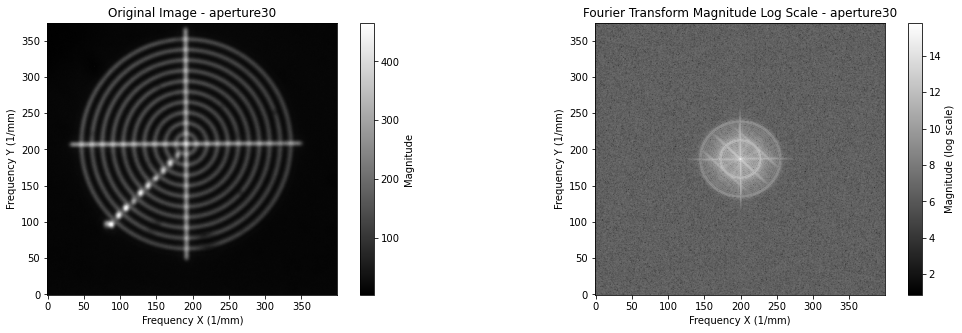

array([[6.90232764, 6.99645139, 6.88607288, ..., 7.05073983, 6.11784231,
        6.70427641],
       [6.82939077, 6.85940483, 5.38122923, ..., 7.25482618, 5.89604625,
        5.91287805],
       [6.94751534, 6.82898827, 6.10858725, ..., 5.33986563, 6.4091878 ,
        5.48514492],
       ...,
       [6.94751534, 5.48514492, 6.4091878 , ..., 5.25545603, 6.10858725,
        6.82898827],
       [6.82939077, 5.91287805, 5.89604625, ..., 6.08126428, 5.38122923,
        6.85940483],
       [6.90232764, 6.70427641, 6.11784231, ..., 5.9915492 , 6.88607288,
        6.99645139]])

In [ ]:
x1, y1, x2, y2 = 600, 250, 1000, 625
zoomed_image = zoom_image(image_10bit, x1, y1, x2, y2)
show_image_fourier(zoomed_image, "aperture30")

<div class="alert alert-block alert-success">
    
<font color='black'> 12. Explain what you are seeing in the three cases. <br/>
</font>

</div>

In the three cases, we’re comparing how aperture affects image clarity and the spread of frequency content in the Fourier domain.

Aperture 100: The image is bright but not the sharpest. The wide aperture allows a lot of light and high frequencies, but the image looks slightly soft due to potential overexposure of edges.

Aperture 60: This setting gives the clearest image. The concentric rings are sharp and well-separated, and the Fourier transform still contains a strong spread of frequencies. This appears to be the best trade-off between light, resolution, and system performance.

Aperture 30: The image gets darker and loses detail. The fine rings are blurred, and the Fourier transform shows reduced frequency content. This indicates that a smaller aperture is now limiting the system’s ability to resolve fine features, likely due to diffraction issues.

Aperture 60 produces the clearest image, and this shows that the "best" aperture isn’t always the widest — it’s the one that balances light, sharpness, and system limitations.